# Least Squares Khatri-Rao Factorization (LSKRF)

In [134]:
import numpy as np
from numpy import kron
from numpy.linalg import svd, norm
from numpy.random import randn, rand
import time

In [2]:
def khatri_rao(A, B):
    '''
    Returns the Khatri-Rao product between matrices A and B
    _______________________________________
    Inputs:
        A: Matrix with n number of columns
        B: Matrix with n number of columns
    _______________________________________
    Outputs:
        X: Khatri-Rao product of A and B
    '''
    # Verify that matrices have the same number of columns
    assert A.shape[1] == B.shape[1]
    
    # transposing matrices because looping through rows is simpler in Python    
    A = A.T
    B = B.T

    result = []

    for Ai in range(0, len(A)):
        for Bi in range(0, len(B)):
            if Ai == Bi: 
                # if index of row_A is equals to index of row_B, then append kron(row_A, row_B)
                result.append(np.kron(A[Ai], B[Bi]))

    return np.array(result).T # transposing back to column format

## Part 1

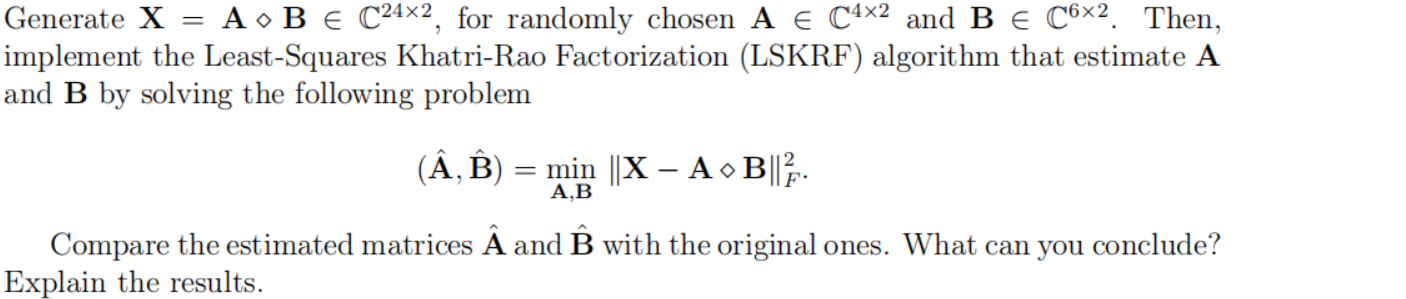

In [164]:
np.random.seed(0) # set a seed so that random matrices fixed

A = randn(4, 2)
B = randn(6, 2)

np.random.seed(1)

A = A + randn(4, 2)*1j
B = B + randn(6, 2)*1j

X = khatri_rao(A, B)

assert X.shape == (24, 2) # guarantee that the shape is correct

In [165]:
A

array([[ 1.76405235+1.62434536j,  0.40015721-0.61175641j],
       [ 0.97873798-0.52817175j,  2.2408932 -1.07296862j],
       [ 1.86755799+0.86540763j, -0.97727788-2.3015387j ],
       [ 0.95008842+1.74481176j, -0.15135721-0.7612069j ]])

In [166]:
B

array([[-0.10321885+0.3190391j ,  0.4105985 -0.24937038j],
       [ 0.14404357+1.46210794j,  1.45427351-2.06014071j],
       [ 0.76103773-0.3224172j ,  0.12167502-0.38405435j],
       [ 0.44386323+1.13376944j,  0.33367433-1.09989127j],
       [ 1.49407907-0.17242821j, -0.20515826-0.87785842j],
       [ 0.3130677 +0.04221375j, -0.85409574+0.58281521j]])

In [167]:
A_hat = []
B_hat = []

for i in range(X.shape[1]):
    X_p = X[:,i].reshape(4, 6).T
    U, S, Vh = svd(X_p)

    ap = np.sqrt(S[0])*Vh[0,:]
    bp = np.sqrt(S[0])*U[:,0]
    
    A_hat.append(ap)
    B_hat.append(bp)
    
A_hat = np.array(A_hat).T
B_hat = np.array(B_hat).T

In [180]:
for i in khatri_rao(A_hat, B_hat):
    print("{} & {} \\\\".format(str(round(i[0], 4)).strip('(').strip(')'), str(round(i[1], 4)).strip('(').strip(')')))

-0.7003+0.3951j & 0.0118-0.351j \\
-2.1209+2.8132j & -0.6784-1.714j \\
1.8662+0.6674j & -0.1863-0.2281j \\
-1.0586+2.721j & -0.5393-0.6443j \\
2.9157+2.1227j & -0.6191-0.2258j \\
0.4837+0.583j & 0.0148+0.7557j \\
0.0675+0.3668j & 0.6525-0.9994j \\
0.9132+1.3549j & 1.0484-6.1769j \\
0.5746-0.7175j & -0.1394-0.9912j \\
1.0333+0.8752j & -0.4324-2.8228j \\
1.3712-0.9579j & -1.4017-1.7471j \\
0.3287-0.124j & -1.2886+2.2224j \\
-0.4689+0.5065j & -0.9752-0.7013j \\
-0.9963+2.8552j & -6.1627-1.3337j \\
1.7003+0.0565j & -1.0028+0.0953j \\
-0.1522+2.5015j & -2.8575+0.3069j \\
2.9395+0.971j & -1.8199+1.3301j \\
0.5481+0.3498j & 2.1761+1.3962j \\
-0.6547+0.123j & -0.252-0.2748j \\
-2.4142+1.6405j & -1.7883-0.7952j \\
1.2856+1.0215j & -0.3108-0.0345j \\
-1.5565+1.8516j & -0.8877-0.0875j \\
1.7204+2.4431j & -0.6372+0.289j \\
0.2238+0.5864j & 0.5729+0.5619j \\


C:\Users\saulo_mendes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:

The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.



## Part 2

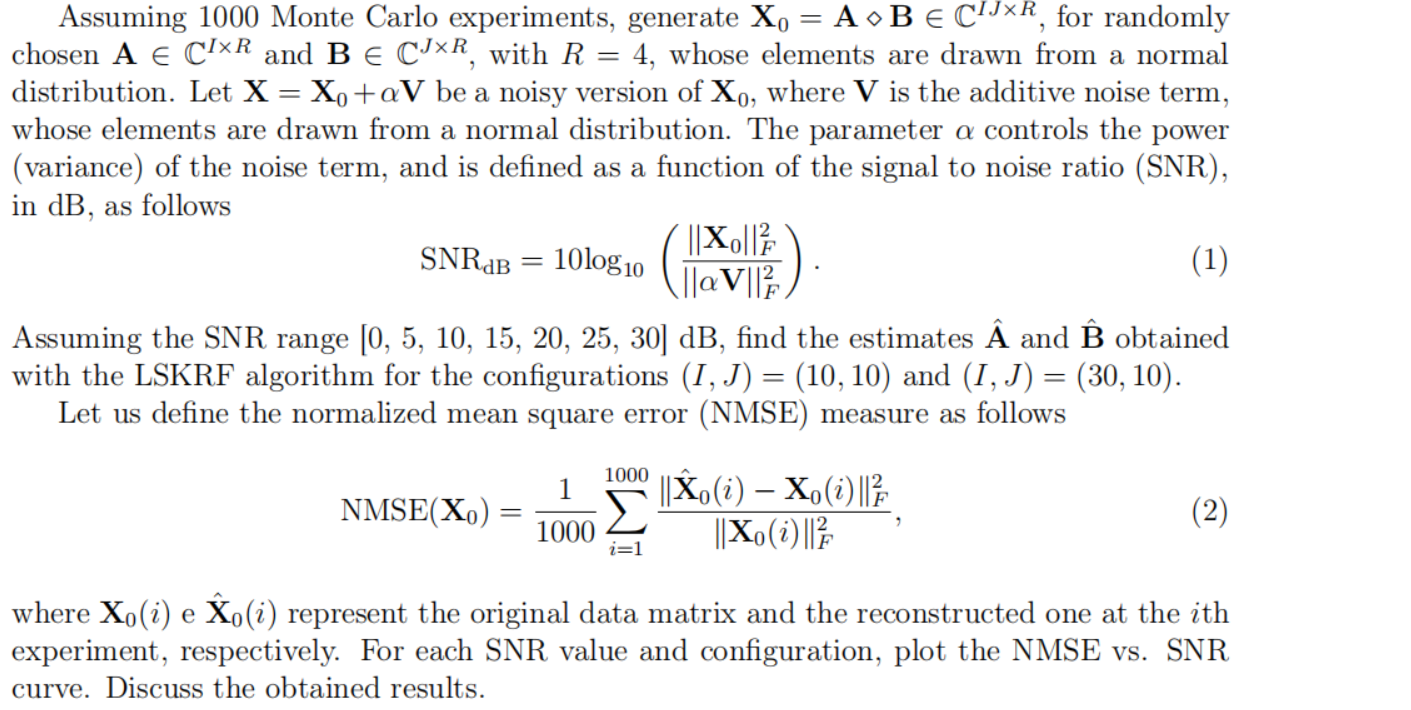

In [10]:
def error(X_0, X_0_hat):
    return norm(X_0_hat - X_0, 'fro')**2/norm(X_0, 'fro')**2

### (I, J) = (10, 10)

In [191]:
I, J = 10, 10
R = 4
SNRdb_range = [0, 5, 10, 15, 20, 25, 30]
No_experiments = 1000

# randn method gets random floats sampled from a univariate 
# “normal” (Gaussian) distribution of mean 0 and variance 1

NMSE_1010 = []

for SNRdb in SNRdb_range:
    exp_errors = [] # list of errors for the experiments
    
    for i in range(No_experiments):

        # generating X_0 and V (noise matrix)
        A = randn(I, R)
        B = randn(J, R)
        V = randn(I*J, R) 
        
        A = A + randn(I, R)*1j
        B = B + randn(J, R)*1j
        V = V + randn(I*J, R)*1j

        X_0 = khatri_rao(A, B)

        assert X_0.shape == (I*J, R) # guarantee that the shape is correct

        # calculating alpha and X
        alpha = np.sqrt((1/10**(SNRdb/10))*(norm(X_0, 'fro')**2/norm(V, 'fro')**2))
        X = X_0 + alpha*V

        # LSKRF on X to estimate A_hat and B_hat
        A_hat = []
        B_hat = []

        for i in range(X.shape[1]):
            X_p = X[:,i].reshape(I, J).T
            U, S, Vh = svd(X_p)

            ap = np.sqrt(S[0])*Vh[0,:]
            bp = np.sqrt(S[0])*U[:,0]

            A_hat.append(ap)
            B_hat.append(bp)

        A_hat = np.array(A_hat).T
        B_hat = np.array(B_hat).T

        # calculating X_0_hat based on estimations
        X_0_hat = khatri_rao(A_hat, B_hat)
        
        # calculating error of X_0_hat estimation
        exp_errors.append(error(X_0, X_0_hat))

    # saving NMSE for this SNRdb value
    NMSE_1010.append(np.sum(exp_errors)/No_experiments)
    

In [192]:
NMSE_1010

[0.21771881452041122,
 0.06270847250771991,
 0.019293315591129408,
 0.00604327390937052,
 0.0019071144435125096,
 0.0006028709534656284,
 0.0001907495771888847]

### (I, J) = (30, 10)

In [193]:
I, J = 30, 10
R = 4
SNRdb_range = [0, 5, 10, 15, 20, 25, 30]
No_experiments = 1000

# randn method gets random floats sampled from a univariate 
# “normal” (Gaussian) distribution of mean 0 and variance 1

NMSE_3010 = []

for SNRdb in SNRdb_range:
    exp_errors = [] # list of errors for the experiments
    
    for i in range(No_experiments):

        # generating X_0 and V (noise matrix)
        A = randn(I, R)
        B = randn(J, R)
        V = randn(I*J, R)
        
        A = A + randn(I, R)*1j
        B = B + randn(J, R)*1j
        V = V + randn(I*J, R)*1j

        X_0 = khatri_rao(A, B)

        assert X_0.shape == (I*J, R) # guarantee that the shape is correct

        # calculating alpha and X
        alpha = np.sqrt((1/10**(SNRdb/10))*(norm(X_0, 'fro')**2/norm(V, 'fro')**2))
        X = X_0 + alpha*V

        # LSKRF on X to estimate A_hat and B_hat
        A_hat = []
        B_hat = []

        for i in range(X.shape[1]):
            X_p = X[:,i].reshape(I, J).T
            U, S, Vh = svd(X_p)

            ap = np.sqrt(S[0])*Vh[0,:]
            bp = np.sqrt(S[0])*U[:,0]

            A_hat.append(ap)
            B_hat.append(bp)

        A_hat = np.array(A_hat).T
        B_hat = np.array(B_hat).T

        # calculating X_0_hat based on estimations
        X_0_hat = khatri_rao(A_hat, B_hat)
        
        # calculating error of X_0_hat estimation
        exp_errors.append(error(X_0, X_0_hat))

    # saving NMSE for this SNRdb value
    NMSE_3010.append(np.sum(exp_errors)/No_experiments)
    

In [194]:
NMSE_3010

[0.139555031658124,
 0.04207507192667265,
 0.013089971080848192,
 0.004126071133793282,
 0.0012989372903711445,
 0.0004127221198274946,
 0.00013013041971998455]

In [200]:
import plotly.graph_objects as go

fig = go.Figure(
    layout=go.Layout(
        title="NMSE vs SNR curve",
        template="simple_white"))

fig.add_trace(go.Scatter(x=SNRdb_range, y=NMSE_1010, mode='lines+markers', name='(I, J) = (10, 10)'))
fig.add_trace(go.Scatter(x=SNRdb_range, y=NMSE_3010, mode='lines+markers', name='(I, J) = (30, 10)'))

fig.update_yaxes(title='NMSE',showgrid=True,type="log")
fig.update_xaxes(title='SNR(dB)')

fig.show()